### 서울시 범죄현황분석

In [2]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline
mpl.rc('font', family='Malgun Gothic')
mpl.rc('axes', unicode_minus=False)
import seaborn as sns
import json
import folium

In [3]:
df = pd.read_table('./과제data/서울시 5대 범죄 발생현황 통계.txt' , header=1, thousands = ',') # thousands = ',' 로 숫자단위를 지정하던 , 없애기
df.head()

,기간,자치구,발생,검거,발생.1,검거.1,발생.2,검거.2,발생.3,검거.3,발생.4,검거.4,발생.5,검거.5
0,2019,합계,103668,74805,136,128,136,133,6469,6007,42204,21284,54723,47253
1,2019,종로구,3846,4117,4,5,7,8,238,1143,1515,1069,2082,1892
2,2019,중구,4327,2804,2,1,6,5,195,115,2202,1050,1922,1633
3,2019,용산구,3313,2611,3,3,3,4,272,237,999,544,2036,1823
4,2019,성동구,2512,1838,6,5,9,10,133,96,970,511,1394,1216


In [4]:
df.rename({'자치구': '구별', '발생' : '발생합계', '검거' : '검거합계', '발생.1': '살인발생', '검거.1': '살인검거', '발생.2': '강도발생', '검거.2': '강도검거','발생.3': '강간발생', '검거.3': '강간검거', '발생.4': '절도발생', '검거.4': '절도검거','발생.5': '폭력발생','검거.5': '폭력검거'}, inplace=True, axis=1)
del df['기간']
del df['발생합계']
del df['검거합계']
df.head()

,구별,살인발생,살인검거,강도발생,강도검거,강간발생,강간검거,절도발생,절도검거,폭력발생,폭력검거
0,합계,136,128,136,133,6469,6007,42204,21284,54723,47253
1,종로구,4,5,7,8,238,1143,1515,1069,2082,1892
2,중구,2,1,6,5,195,115,2202,1050,1922,1633
3,용산구,3,3,3,4,272,237,999,544,2036,1823
4,성동구,6,5,9,10,133,96,970,511,1394,1216


In [5]:
df.drop([0], inplace=True)
df.head()

,구별,살인발생,살인검거,강도발생,강도검거,강간발생,강간검거,절도발생,절도검거,폭력발생,폭력검거
1,종로구,4,5,7,8,238,1143,1515,1069,2082,1892
2,중구,2,1,6,5,195,115,2202,1050,1922,1633
3,용산구,3,3,3,4,272,237,999,544,2036,1823
4,성동구,6,5,9,10,133,96,970,511,1394,1216
5,광진구,4,5,6,5,273,213,1875,1008,1853,1585


In [6]:
df['강간검거율'] = df['강간검거'] / df['강간발생']*100
df['강도검거율'] = df['강도검거'] / df['강도발생']*100
df['살인검거율'] = df['살인검거'] / df['살인발생']*100
df['절도검거율'] = df['절도검거'] / df['절도발생']*100
df['폭력검거율'] = df['폭력검거'] / df['폭력발생']*100
del df['강간검거']
del df['강도검거']
del df['살인검거']
del df['절도검거']
del df['폭력검거']
df.head()

,구별,살인발생,강도발생,강간발생,절도발생,폭력발생,강간검거율,강도검거율,살인검거율,절도검거율,폭력검거율
1,종로구,4,7,238,1515,2082,480.252101,114.285714,125.000000,70.561056,90.874159
2,중구,2,6,195,2202,1922,58.974359,83.333333,50.000000,47.683924,84.963580
3,용산구,3,3,272,999,2036,87.132353,133.333333,100.000000,54.454454,89.538310
4,성동구,6,9,133,970,1394,72.180451,111.111111,83.333333,52.680412,87.230990
5,광진구,4,6,273,1875,1853,78.021978,83.333333,125.000000,53.760000,85.536967


In [7]:
con_list = ['강간검거율', '강도검거율', '살인검거율','절도검거율', '폭력검거율']

for column in con_list:
    df.loc[df[column] > 100, column] = 100

df.head()

,구별,살인발생,강도발생,강간발생,절도발생,폭력발생,강간검거율,강도검거율,살인검거율,절도검거율,폭력검거율
1,종로구,4,7,238,1515,2082,100.000000,100.000000,100.000000,70.561056,90.874159
2,중구,2,6,195,2202,1922,58.974359,83.333333,50.000000,47.683924,84.963580
3,용산구,3,3,272,999,2036,87.132353,100.000000,100.000000,54.454454,89.538310
4,성동구,6,9,133,970,1394,72.180451,100.000000,83.333333,52.680412,87.230990
5,광진구,4,6,273,1875,1853,78.021978,83.333333,100.000000,53.760000,85.536967


In [8]:
df.rename({'살인발생' : '살인', '강도발생' : '강도', 
'강간발생' : '강간', '절도발생' : '절도', '폭력발생' : '폭력'}, inplace=True, axis=1)
df.head()

,구별,살인,강도,강간,절도,폭력,강간검거율,강도검거율,살인검거율,절도검거율,폭력검거율
1,종로구,4,7,238,1515,2082,100.000000,100.000000,100.000000,70.561056,90.874159
2,중구,2,6,195,2202,1922,58.974359,83.333333,50.000000,47.683924,84.963580
3,용산구,3,3,272,999,2036,87.132353,100.000000,100.000000,54.454454,89.538310
4,성동구,6,9,133,970,1394,72.180451,100.000000,83.333333,52.680412,87.230990
5,광진구,4,6,273,1875,1853,78.021978,83.333333,100.000000,53.760000,85.536967


In [9]:
df.set_index('구별', inplace=True)
df.head()

,살인,강도,강간,절도,폭력,강간검거율,강도검거율,살인검거율,절도검거율,폭력검거율
구별,,,,,,,,,,
종로구,4,7,238,1515,2082,100.000000,100.000000,100.000000,70.561056,90.874159
중구,2,6,195,2202,1922,58.974359,83.333333,50.000000,47.683924,84.963580
용산구,3,3,272,999,2036,87.132353,100.000000,100.000000,54.454454,89.538310
성동구,6,9,133,970,1394,72.180451,100.000000,83.333333,52.680412,87.230990
광진구,4,6,273,1875,1853,78.021978,83.333333,100.000000,53.760000,85.536967


### 정규화

In [10]:
from sklearn import preprocessing
col = ['강간', '강도', '살인', '절도', '폭력']

x = df[col].values
min_max_scaler = preprocessing.MinMaxScaler()

x_scaled = min_max_scaler.fit_transform(x.astype(float))
df_norm = pd.DataFrame(x_scaled, columns= col, index= df.index)

col2 = ['강간검거율', '강도검거율', '살인검거율', '절도검거율', '폭력검거율']
df_norm[col2] = df[col2]
df_norm.head()

,강간,강도,살인,절도,폭력,강간검거율,강도검거율,살인검거율,절도검거율,폭력검거율
구별,,,,,,,,,,
종로구,0.256944,0.428571,0.250000,0.332569,0.352506,100.000000,100.000000,100.000000,70.561056,90.874159
중구,0.182292,0.357143,0.083333,0.647706,0.286771,58.974359,83.333333,50.000000,47.683924,84.963580
용산구,0.315972,0.142857,0.166667,0.095872,0.333607,87.132353,100.000000,100.000000,54.454454,89.538310
성동구,0.074653,0.571429,0.416667,0.082569,0.069844,72.180451,100.000000,83.333333,52.680412,87.230990
광진구,0.317708,0.357143,0.250000,0.497706,0.258422,78.021978,83.333333,100.000000,53.760000,85.536967


In [11]:
cctv = pd.read_excel('./과제data/서울시 자치구 년도별 CCTV 설치 현황(2011년 이전_2018년).xlsx')
cctv.head()

,기관명,소계,2011년 이전,2012년,2013년,2014년,2015년,2016년,2017년,2018년
0,강 남 구,5221,1944.0,195.0,316.0,430,546,765,577,448
1,강 동 구,1879,303.0,387.0,134.0,59,144,194,273,385
2,강 북 구,1265,243.0,88.0,141.0,74,145,254,1,319
3,강 서 구,1617,219.0,155.0,118.0,230,187,190,264,254
4,관 악 구,3985,430.0,56.0,419.0,487,609,619,694,671


In [12]:
cctv.rename({'기관명': '구별'}, inplace=True, axis=1)
cctv['구별'] = cctv['구별'].str.replace(' ','')
cctv.set_index('구별', inplace=True)
cctv.head()

,소계,2011년 이전,2012년,2013년,2014년,2015년,2016년,2017년,2018년
구별,,,,,,,,,
강남구,5221,1944.0,195.0,316.0,430,546,765,577,448
강동구,1879,303.0,387.0,134.0,59,144,194,273,385
강북구,1265,243.0,88.0,141.0,74,145,254,1,319
강서구,1617,219.0,155.0,118.0,230,187,190,264,254
관악구,3985,430.0,56.0,419.0,487,609,619,694,671


In [13]:
del cctv['2011년 이전']
del cctv['2012년']
del cctv['2013년']
del cctv['2014년']
del cctv['2015년']
del cctv['2016년']
del cctv['2017년']
del cctv['2018년']

In [14]:
peo = pd.read_table('./과제data/report.txt' , header=2, thousands = ',') # thousands = ',' 로 숫자단위를 지정하던 , 없애기
peo.drop([0], inplace=True)
peo.rename({'자치구': '구별', '계' : '인구수'}, inplace=True, axis=1)
peo.set_index('구별', inplace=True)
peo.head()

,기간,세대,인구수,남자,여자,계.1,남자.1,여자.1,계.2,남자.2,여자.2,세대당인구,65세이상고령자
구별,,,,,,,,,,,,,
종로구,2020.3/4,74861,159842,77391,82451,149952,73024,76928,9890,4367,5523,2.00,28396
중구,2020.3/4,63594,135321,66193,69128,125800,61526,64274,9521,4667,4854,1.98,24265
용산구,2020.3/4,112451,244953,119074,125879,229786,110604,119182,15167,8470,6697,2.04,39995
성동구,2020.3/4,136096,302695,147582,155113,295591,144444,151147,7104,3138,3966,2.17,45372
광진구,2020.3/4,166857,361923,174077,187846,348064,168095,179969,13859,5982,7877,2.09,50047


In [15]:
n_peo = pd.DataFrame(peo[['인구수']])

In [16]:
c_peo = pd.merge(n_peo,cctv, on='구별')
c_peo.head()

,인구수,소계
구별,,
종로구,159842,1471
중구,135321,1544
용산구,244953,2063
성동구,302695,2679
광진구,361923,1581


In [17]:
df_norm['인구수'] = c_peo['인구수']
df_norm['CCTV'] = c_peo['소계']
df_norm.head()

,강간,강도,살인,절도,폭력,강간검거율,강도검거율,살인검거율,절도검거율,폭력검거율,인구수,CCTV
구별,,,,,,,,,,,,
종로구,0.256944,0.428571,0.250000,0.332569,0.352506,100.000000,100.000000,100.000000,70.561056,90.874159,159842,1471
중구,0.182292,0.357143,0.083333,0.647706,0.286771,58.974359,83.333333,50.000000,47.683924,84.963580,135321,1544
용산구,0.315972,0.142857,0.166667,0.095872,0.333607,87.132353,100.000000,100.000000,54.454454,89.538310,244953,2063
성동구,0.074653,0.571429,0.416667,0.082569,0.069844,72.180451,100.000000,83.333333,52.680412,87.230990,302695,2679
광진구,0.317708,0.357143,0.250000,0.497706,0.258422,78.021978,83.333333,100.000000,53.760000,85.536967,361923,1581


In [18]:
col = ['강간','강도','살인','절도','폭력']
df_norm['범죄'] = np.sum(df_norm[col], axis=1)
df_norm.head()

,강간,강도,살인,절도,폭력,강간검거율,강도검거율,살인검거율,절도검거율,폭력검거율,인구수,CCTV,범죄
구별,,,,,,,,,,,,,
종로구,0.256944,0.428571,0.250000,0.332569,0.352506,100.000000,100.000000,100.000000,70.561056,90.874159,159842,1471,1.620591
중구,0.182292,0.357143,0.083333,0.647706,0.286771,58.974359,83.333333,50.000000,47.683924,84.963580,135321,1544,1.557245
용산구,0.315972,0.142857,0.166667,0.095872,0.333607,87.132353,100.000000,100.000000,54.454454,89.538310,244953,2063,1.054975
성동구,0.074653,0.571429,0.416667,0.082569,0.069844,72.180451,100.000000,83.333333,52.680412,87.230990,302695,2679,1.215161
광진구,0.317708,0.357143,0.250000,0.497706,0.258422,78.021978,83.333333,100.000000,53.760000,85.536967,361923,1581,1.680980


In [19]:
col = ['강간검거율','강도검거율','살인검거율','절도검거율','폭력검거율']
df_norm['검거'] = np.sum(df_norm[col], axis=1)
df_norm

,강간,강도,살인,절도,폭력,강간검거율,강도검거율,살인검거율,절도검거율,폭력검거율,인구수,CCTV,범죄,검거
구별,,,,,,,,,,,,,,
종로구,0.256944,0.428571,0.250000,0.332569,0.352506,100.000000,100.000000,100.000000,70.561056,90.874159,159842,1471,1.620591,461.435216
중구,0.182292,0.357143,0.083333,0.647706,0.286771,58.974359,83.333333,50.000000,47.683924,84.963580,135321,1544,1.557245,324.955196
용산구,0.315972,0.142857,0.166667,0.095872,0.333607,87.132353,100.000000,100.000000,54.454454,89.538310,244953,2063,1.054975,431.125118
성동구,0.074653,0.571429,0.416667,0.082569,0.069844,72.180451,100.000000,83.333333,52.680412,87.230990,302695,2679,1.215161,395.425187
광진구,0.317708,0.357143,0.250000,0.497706,0.258422,78.021978,83.333333,100.000000,53.760000,85.536967,361923,1581,1.680980,400.652278
동대문구,0.135417,0.642857,0.416667,0.339908,0.309367,85.119048,90.000000,100.000000,54.016982,92.716237,358679,2003,1.844216,421.852267
중랑구,0.083333,0.214286,0.750000,0.401835,0.503698,78.260870,100.000000,100.000000,54.501801,86.000000,400989,1068,1.953152,418.762670
성북구,0.149306,0.142857,0.166667,0.133945,0.159819,73.863636,100.000000,100.000000,67.560074,90.266584,449871,3003,0.752594,431.690294
강북구,0.149306,0.142857,0.416667,0.201376,0.493016,82.386364,66.666667,100.000000,54.027665,91.006601,313550,1265,1.403221,394.087296


In [20]:
df_norm.sort_index(inplace=True)
df_norm.head()

,강간,강도,살인,절도,폭력,강간검거율,강도검거율,살인검거율,절도검거율,폭력검거율,인구수,CCTV,범죄,검거
구별,,,,,,,,,,,,,,
강남구,1.000000,0.285714,0.333333,1.000000,1.000000,84.384384,100.000000,60.000000,45.084175,86.358666,544085,5221,3.619048,375.827225
강동구,0.156250,1.000000,0.416667,0.394495,0.385785,86.111111,93.333333,83.333333,54.969697,86.638927,462275,1879,2.353197,404.386402
강북구,0.149306,0.142857,0.416667,0.201376,0.493016,82.386364,66.666667,100.000000,54.027665,91.006601,313550,1265,1.403221,394.087296
강서구,0.375000,0.142857,0.583333,0.577982,0.547658,83.986928,100.000000,100.000000,52.536585,85.881893,589536,1617,2.226830,422.405406
관악구,0.552083,0.642857,1.000000,0.657339,0.595727,82.107843,100.000000,76.923077,48.807917,88.593867,514555,3985,3.448007,396.432704


In [21]:
# 순서변경
df_norm = df_norm[['강간','강도','살인','절도','폭력','강간검거율', '강도검거율','살인검거율','절도검거율','폭력검거율','인구수','CCTV','범죄','검거']]

### 시각화하기

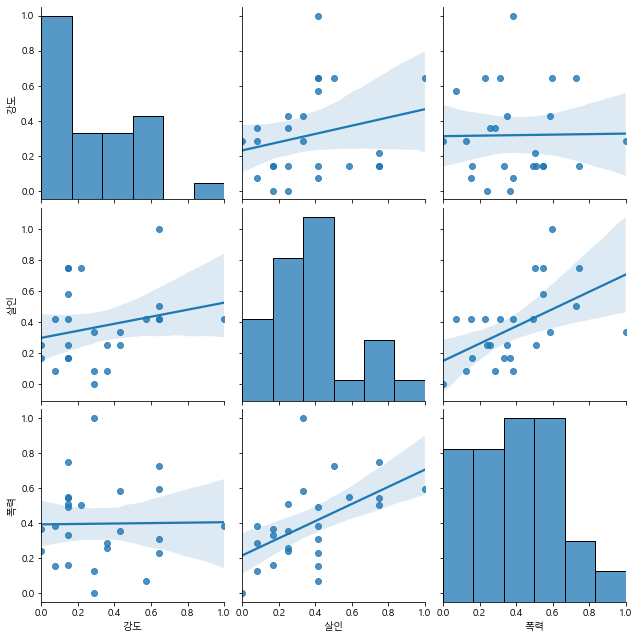

In [22]:
sns.pairplot(df_norm, vars=["강도", "살인", "폭력"], kind='reg', size=3)
plt.show()

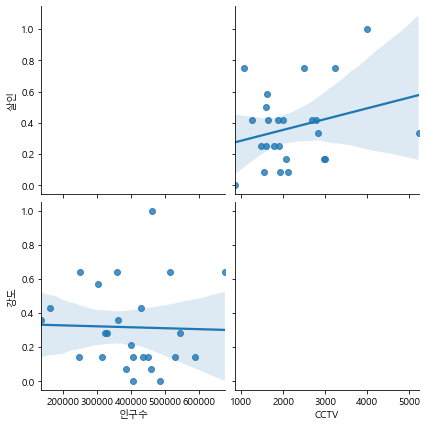

In [23]:
# 데이터가있는데 왜 안들어 오는지 모르겠다.. 포기;
sns.pairplot(df_norm, x_vars=['인구수','CCTV'],
             y_vars=['살인','강도'], kind='reg', size=3)
plt.show()

In [24]:
fp1 =np.polyfit(df_norm['인구수'], df_norm['살인'], 1)
fp1

array([7.63652964e-07, 6.59742072e-02])

In [25]:
f1 = np.poly1d(fp1)
fx = np.linspace(100000, 700000, 100)
fy = f1(fx)

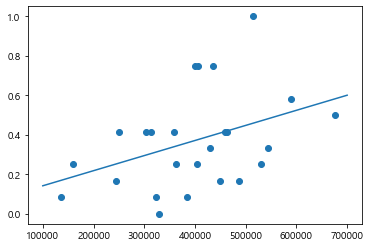

In [26]:
plt.scatter(df_norm['인구수'], df_norm['살인'])
plt.plot(fx,fy)
plt.show()

In [27]:
fp1 =np.polyfit(df_norm['CCTV'], df_norm['강도'], 1)
fp1

array([-7.79351791e-06,  3.34442285e-01])

In [28]:
f1 = np.poly1d(fp1)
fx = np.linspace(800, 5300, 100)
fy = f1(fx)

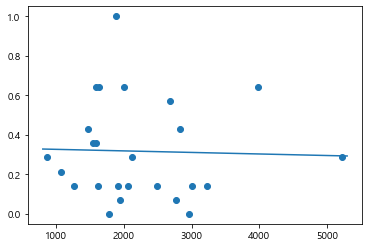

In [29]:
plt.scatter(df_norm['CCTV'], df_norm['강도'])
plt.plot(fx,fy)
plt.show()

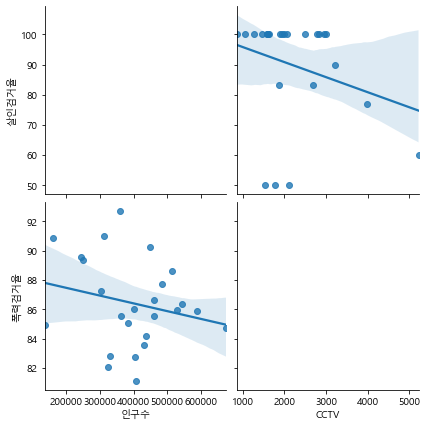

In [30]:
sns.pairplot(df_norm,
x_vars=['인구수','CCTV'],
y_vars=['살인검거율', '폭력검거율'], kind='reg', size=3)
plt.show()

In [31]:
tmp_max = df_norm['검거'].max()
df_norm['검거'] = df_norm['검거'] / tmp_max *100
df_norm_sort = df_norm.sort_values(by='검거', ascending =False)
df_norm_sort.head()

,강간,강도,살인,절도,폭력,강간검거율,강도검거율,살인검거율,절도검거율,폭력검거율,인구수,CCTV,범죄,검거
구별,,,,,,,,,,,,,,
종로구,0.256944,0.428571,0.250000,0.332569,0.352506,100.000000,100.0,100.0,70.561056,90.874159,159842,1471,1.620591,100.000000
은평구,0.180556,0.000000,0.166667,0.355505,0.366886,83.505155,100.0,100.0,62.428115,87.718470,485842,2962,1.069613,93.978900
성북구,0.149306,0.142857,0.166667,0.133945,0.159819,73.863636,100.0,100.0,67.560074,90.266584,449871,3003,0.752594,93.553825
용산구,0.315972,0.142857,0.166667,0.095872,0.333607,87.132353,100.0,100.0,54.454454,89.538310,244953,2063,1.054975,93.431343
도봉구,0.000000,0.285714,0.000000,0.000000,0.000000,92.222222,100.0,100.0,49.873418,82.843137,329300,858,0.285714,92.090669


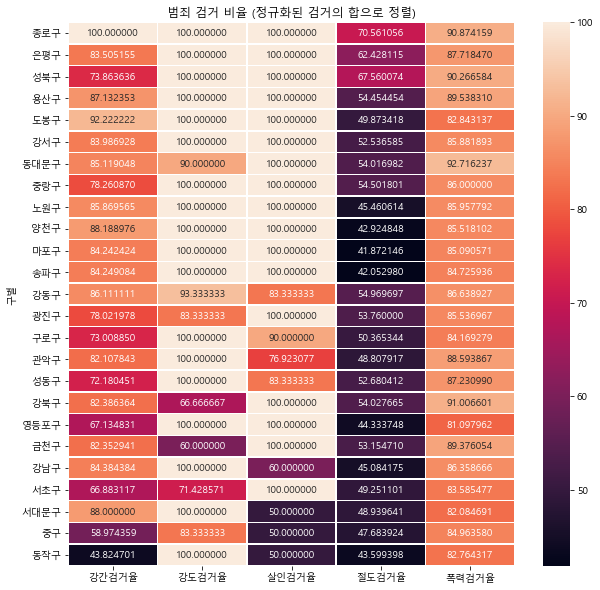

In [32]:
target_col = ['강간검거율', '강도검거율', '살인검거율', '절도검거율', '폭력검거율']

df_norm_sort = df_norm.sort_values(by='검거', ascending = False)

plt.figure(figsize = (10,10))
sns.heatmap(df_norm_sort[target_col], annot=True, fmt='f', linewidths=.5)
plt.title('범죄 검거 비율 (정규화된 검거의 합으로 정렬)')
plt.show()

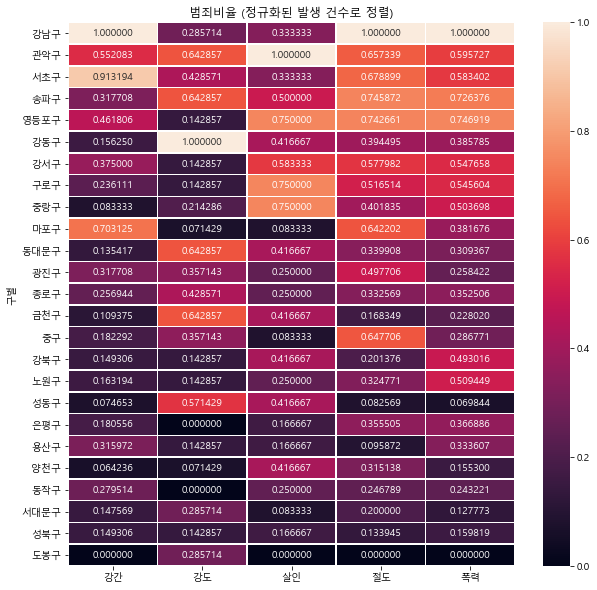

In [33]:
target_col = ['강간', '강도', '살인', '절도', '폭력']

df_norm['범죄'] = df_norm['범죄'] / 5

df_norm_sort = df_norm.sort_values(by='범죄', ascending = False)

plt.figure(figsize = (10,10))
sns.heatmap(df_norm_sort[target_col], annot=True, fmt='f', linewidths=.5)
plt.title('범죄비율 (정규화된 발생 건수로 정렬)')
plt.show()

In [34]:
geo_path = './과제data/02. skorea_municipalities_geo_simple.json'
geo_data = json.load(open(geo_path, encoding='utf-8'))

In [35]:
map = folium.Map(location=[37.5502, 126.982], zoom_start=11, tiles= 'Stamen Toner')
map.choropleth(geo_data = geo_data,
data= df_norm['살인'],
columns= [df_norm.index, df_norm['살인']],
fill_color= 'PuRd',
key_on='feature.id')
map

In [36]:
map = folium.Map(location=[37.5502, 126.982], zoom_start=11, tiles= 'Stamen Toner')
map.choropleth(geo_data = geo_data,
data= df_norm['범죄'],
columns= [df_norm.index, df_norm['범죄']],
fill_color= 'PuRd',
key_on='feature.id')
map

In [37]:
tmp_criminal = df_norm['살인'] / df_norm['인구수'] * 1000000
map = folium.Map(location=[37.5502, 126.982], zoom_start=11, tiles= 'Stamen Toner')
map.choropleth(geo_data = geo_data,
data= tmp_criminal,
columns= [df_norm.index, tmp_criminal],
fill_color= 'PuRd',
key_on='feature.id')
map

### 카카오 API로 검색과 위도 경도 얻기

In [38]:
# import url
from urllib.parse import urlparse
import requests
# 카카오 키 불러오기
key_fd = open('./과제data/kakaomapkey.txt', mode='r')
kmap_key = key_fd.read(100)
key_fd.close()

In [39]:
p_office_list = [
    '서울강남경찰서', '서울강동경찰서', '서울강북경찰서', '서울강서경찰서',
    '서울관악경찰서', '서울광진경찰서', '서울구로경찰서', '서울금천경찰서',
    '서울남대문경찰서', '서울노원경찰서', '서울도봉경찰서', '서울동대문경찰서',
    '서울동작경찰서', '서울마포경찰서', '서울방배경찰서', '서울서대문경찰서',
    '서울서부경찰서', '서울서초경찰서', '서울성동경찰서', '서울성북경찰서',
    '서울송파경찰서', '서울수서경찰서', '서울양천경찰서', '서울영등포경찰서',
    '서울용산경찰서', '서울은평경찰서', '서울종로경찰서', '서울종암경찰서',
    '서울중랑경찰서', '서울중부경찰서', '서울혜화경찰서'
]

In [40]:
# 검색어로 주소찾기
p_office_list_addr =[]
for p_office in p_office_list:
    url = 'https://dapi.kakao.com/v2/local/search/keyword.json?query=' + p_office
    result = requests.get(urlparse(url).geturl(),headers={"Authorization": "KakaoAK "+kmap_key}).json()
    p_office_list_addr.append(result['documents'][0]['address_name'])

In [41]:
p_df = pd.DataFrame({
    'name' : p_office_list,
    'addr' : p_office_list_addr
})

In [42]:
lat_list =[] ; lng_list = [] 
for i in range(len(p_office_list_addr)):
    url = 'https://dapi.kakao.com/v2/local/search/address.json?query=' + p_office_list_addr[i]
    result = requests.get(urlparse(url).geturl(),headers={"Authorization": "KakaoAK "+kmap_key}).json()
    lat = float(result['documents'][0]['address']['y'])
    lng = float(result['documents'][0]['address']['x'])
    lat_list.append(lat)
    lng_list.append(lng)

p_df['lat'] = lat_list
p_df['lng'] = lng_list

In [43]:
p_df.head()

,name,addr,lat,lng
0,서울강남경찰서,서울 강남구 대치동 998,37.509230,127.067089
1,서울강동경찰서,서울 강동구 성내동 541-1,37.528683,127.126736
2,서울강북경찰서,서울 강북구 번동 415-15,37.637296,127.027351
3,서울강서경찰서,서울 양천구 신월동 25,37.539763,126.830158
4,서울관악경찰서,서울 관악구 봉천동 1695-5,37.474449,126.951229


In [50]:
map = folium.Map(location=[37.5502, 126.982], zoom_start=11,
                 tiles='Stamen Toner')
map.choropleth(geo_data = geo_data,
               data = df_norm['검거'],
               columns = [df_norm.index, df_norm['검거']],
               fill_color = 'PuRd',
               key_on = 'feature.id')
for i in p_df.index:
    folium.Marker([p_df.lat[i], p_df.lng[i]], radius=10,
                        tooltip=p_df.name[i],
                        color='#3186cc', fill_color='#3186cc').add_to(map)
map

In [47]:
df_norm

,강간,강도,살인,절도,폭력,강간검거율,강도검거율,살인검거율,절도검거율,폭력검거율,인구수,CCTV,범죄,검거
구별,,,,,,,,,,,,,,
강남구,1.000000,0.285714,0.333333,1.000000,1.000000,84.384384,100.000000,60.000000,45.084175,86.358666,544085,5221,0.723810,81.447452
강동구,0.156250,1.000000,0.416667,0.394495,0.385785,86.111111,93.333333,83.333333,54.969697,86.638927,462275,1879,0.470639,87.636658
강북구,0.149306,0.142857,0.416667,0.201376,0.493016,82.386364,66.666667,100.000000,54.027665,91.006601,313550,1265,0.280644,85.404686
강서구,0.375000,0.142857,0.583333,0.577982,0.547658,83.986928,100.000000,100.000000,52.536585,85.881893,589536,1617,0.445366,91.541649
관악구,0.552083,0.642857,1.000000,0.657339,0.595727,82.107843,100.000000,76.923077,48.807917,88.593867,514555,3985,0.689601,85.912971
광진구,0.317708,0.357143,0.250000,0.497706,0.258422,78.021978,83.333333,100.000000,53.760000,85.536967,361923,1581,0.336196,86.827417
구로구,0.236111,0.142857,0.750000,0.516514,0.545604,73.008850,100.000000,90.000000,50.365344,84.169279,435751,3227,0.438217,86.153692
금천구,0.109375,0.642857,0.416667,0.168349,0.228020,82.352941,60.000000,100.000000,53.154710,89.376054,249641,1634,0.313053,83.410128
노원구,0.163194,0.142857,0.250000,0.324771,0.509449,85.869565,100.000000,100.000000,45.460614,85.957792,529532,1906,0.278054,90.432624


In [49]:
df_norm.to_csv('./results/서울시5대범죄.csv')